In [1]:

from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import cv2

In [2]:
nc = NetCDFFile('samples_2020.01.10_nonoverlap.nc')

In [6]:
lats = nc.variables['gridLats'][:]
lons = nc.variables['gridLons'][:]
time = nc.variables['time'][:]
temp = nc.variables['temperature'][:]
u_current = nc.variables['u_east'][:]
v_current = nc.variables['v_north'][:]
u_wind = nc.variables['w_east'][:]
v_wind = nc.variables['w_north'][:]
w_velocity =nc.variables['w_velocity'][:]


In [3]:

map = Basemap(projection='merc', llcrnrlon=-15.,llcrnrlat=55.,urcrnrlon=35.,urcrnrlat=80.,resolution='i' )

<Figure size 10000x10000 with 0 Axes>

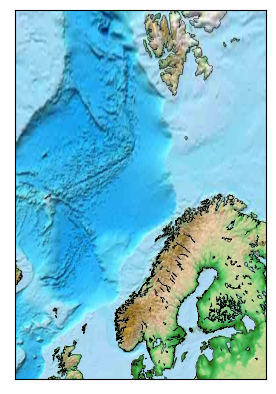

<Figure size 10000x10000 with 0 Axes>

In [5]:
map.drawcoastlines(linewidth=.3)
map.drawlsmask()
map.etopo()
plt.figure(figsize=(100,100))

In [4]:
depth = nc.variables['depth']
print(depth.shape)

(620, 941)


In [7]:
print(lons.shape)
print(temp.shape)
print(u_current.shape)
print(lats.shape)
print(u_wind.shape)
print(w_velocity.shape)

(620, 941)
(24, 34, 620, 941)
(24, 34, 620, 941)
(620, 941)
(24, 620, 941)
(24, 34, 620, 941)


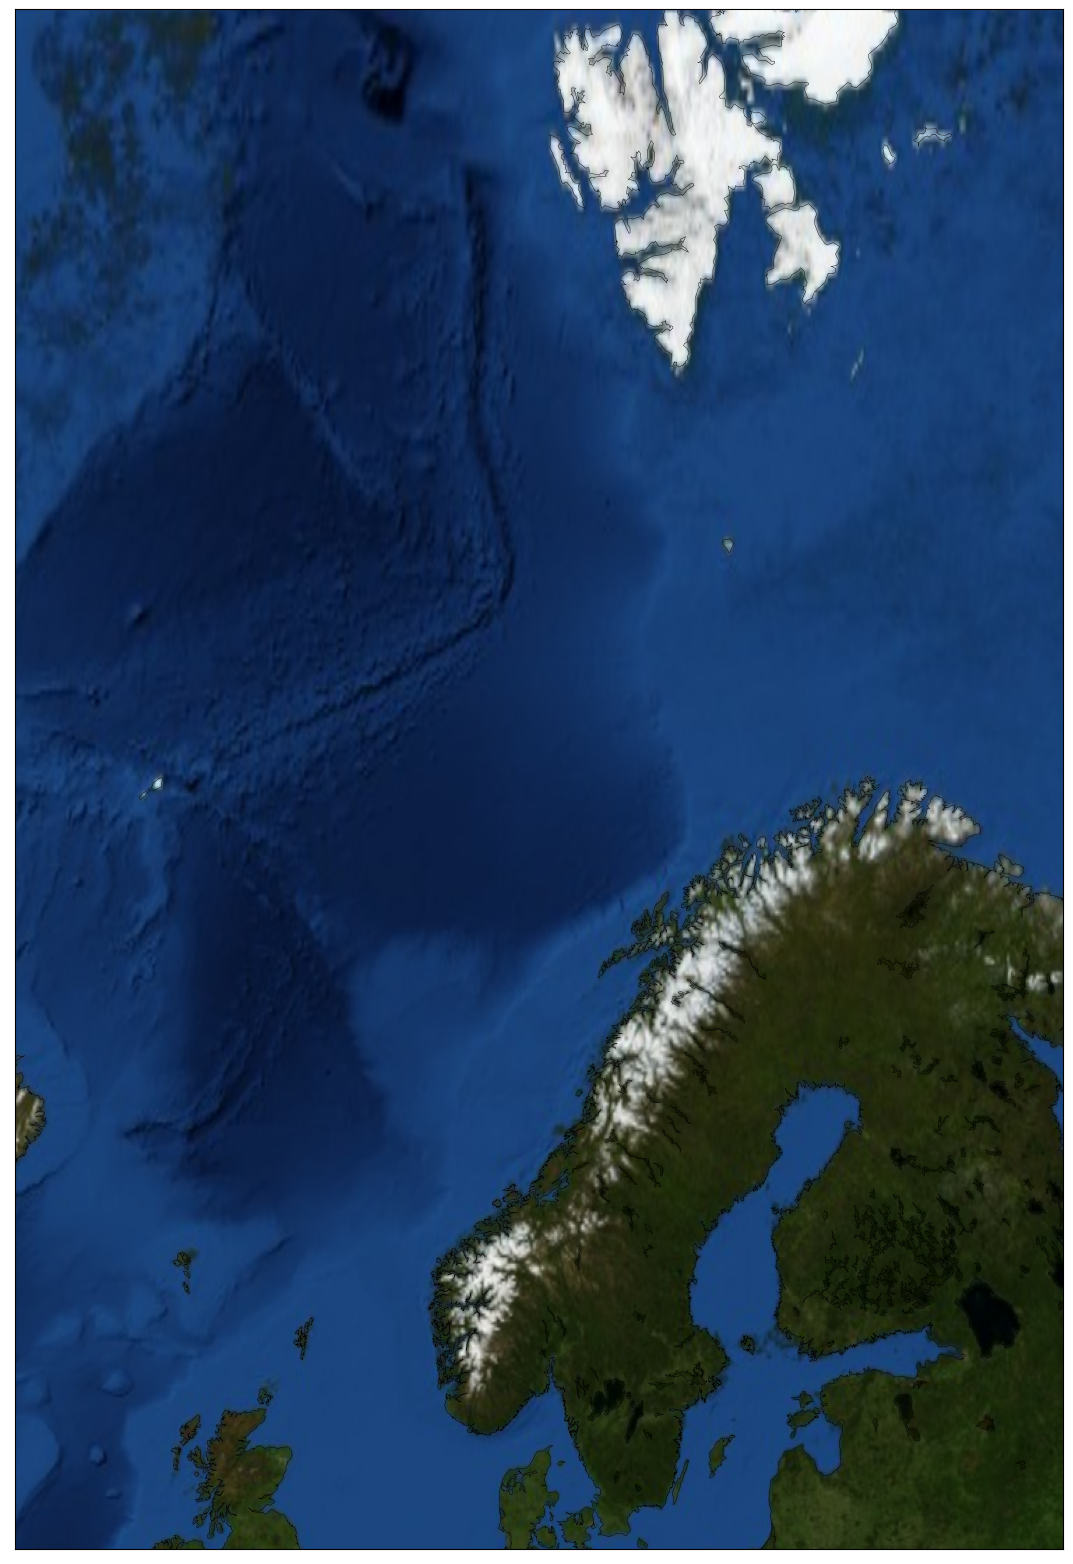

In [19]:
#temperature = map.contourf(lons, lats,temp[5,0,:,:]-273.16,30, latlon=True, cmap =plt.cm.RdYlBu_r)
#cb = map.colorbar(temperature,"bottom", size="5%", pad="2%", label="Temperature in degrees C")
#currents = map.quiver(lons, lats, u_current[0,0,:,:], v_current[0,0,:,:], latlon= True)
u_wind_plottable = u_wind[:,::10,::10]
v_wind_plottable = v_wind[:,::10,::10]
u_current_plottable = u_current[:,0,::10,::10]
v_current_plottable = v_current[:,0,::10,::10]
#print(u_wind_plottable.shape)
plt.figure(figsize=(20,20))

#[[if depth[xc,yc] ==  for yc in range(depth.shape[1])]for xc in range(depth.shape[0])]
#map.barbs(lons[::10,::10], lats[::10,::10], u_wind_plottable[0,:,:], v_wind_plottable[0,:,:], latlon= True)
#currents = map.quiver(lons[::10,::10], lats[::10,::10], u_current_plottable[0,:,:], v_current_plottable[0,:,:], latlon= True)
#map.contour(lons, lats, depth,latlon=True)
map.drawcoastlines(linewidth=.3)
map.bluemarble()



In [186]:
fig = plt.figure()
fig.set_size_inches(25,25)
size = fig.get_size_inches()*fig.dpi
print(size)
video = cv2.VideoWriter('video.mp4' ,cv2.VideoWriter_fourcc('A','V','C','1'), 1, (2500,2500))

[2500. 2500.]


In [23]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

for i in range(24):
    plt.ioff()
    fig = plt.figure()
    fig.set_size_inches(20,20)
    temperature = map.contourf(lons, lats,temp[i,0,:,:]-273.16,100, latlon=True, cmap =plt.cm.RdYlBu_r)
    cb = map.colorbar(temperature,"bottom", size="5%", pad="2%", label="Temperature in degrees C")
    map.quiver(lons[::10,::10], lats[::10,::10], u_current_plottable[i,:,:], v_current_plottable[i,:,:], latlon= True)
    map.drawcoastlines(linewidth=.3)
    canvas = FigureCanvas(fig)
    canvas.draw()
    mat = np.array(canvas.renderer._renderer)
    mat = cv2.cvtColor(mat, cv2.COLOR_RGB2BGR)
    video.write(mat)
cv2.destroyAllWindows()
video.release()

NameError: name 'video' is not defined

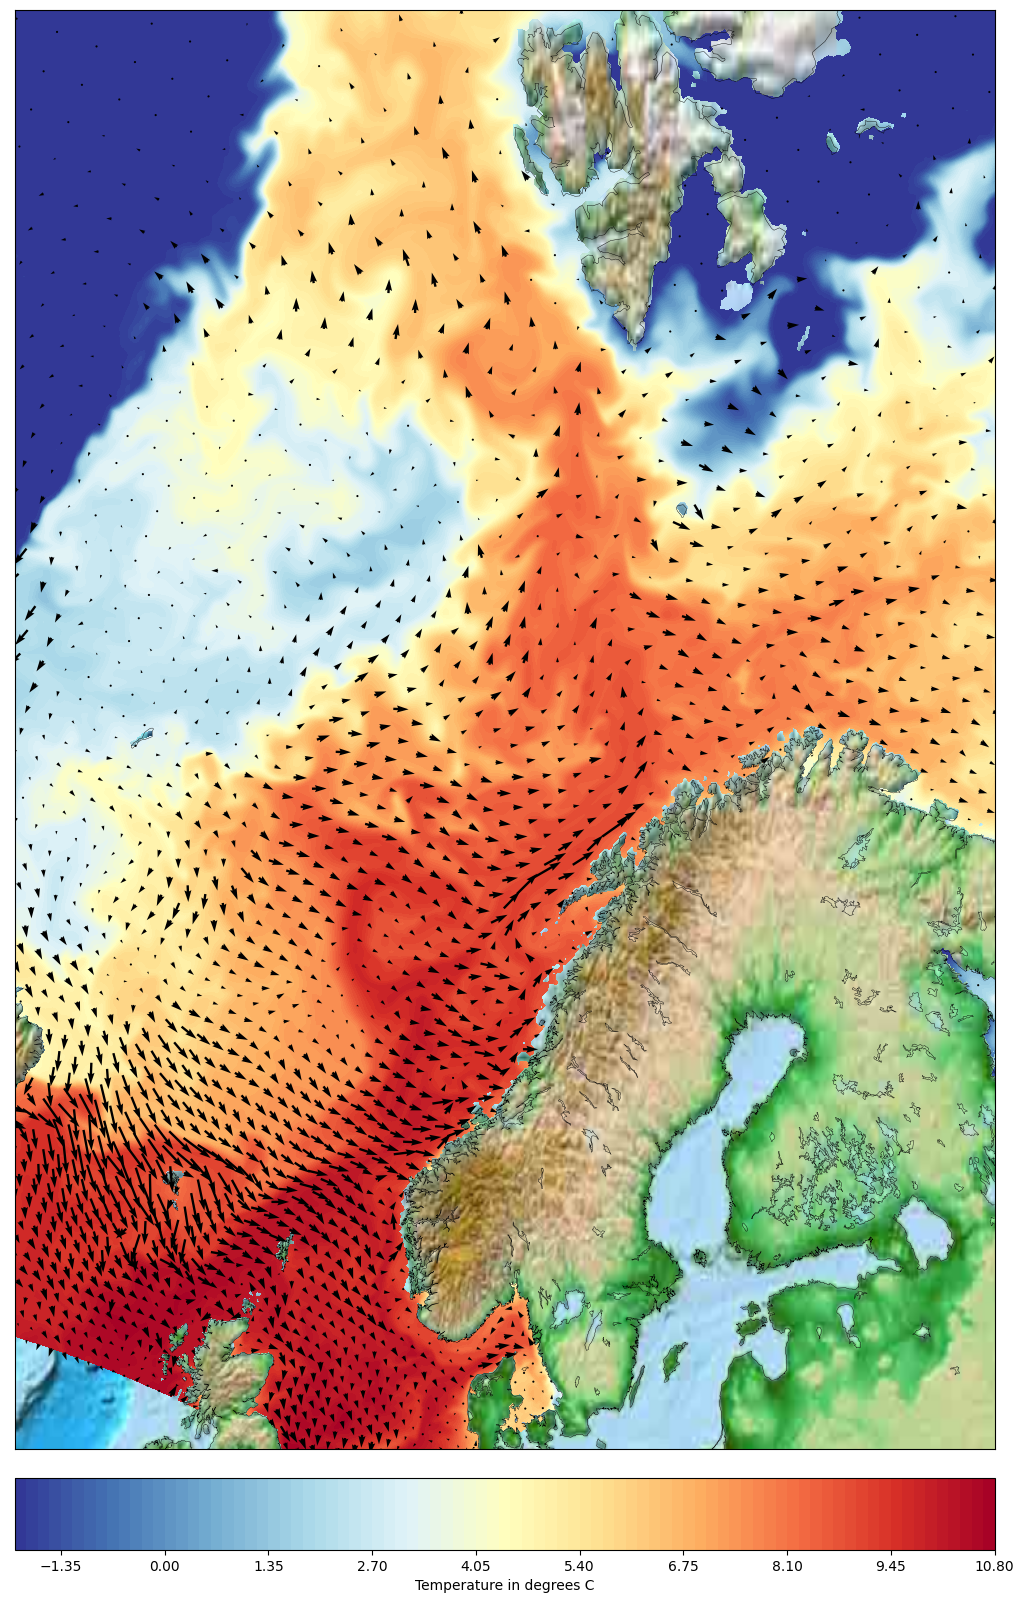

In [29]:
fig = plt.figure()
fig.set_size_inches(20,20)
temperature = map.contourf(lons, lats,temp[12,0,:,:]-273.16,100, latlon=True, cmap =plt.cm.RdYlBu_r)
cb = map.colorbar(temperature,"bottom", size="5%", pad="2%", label="Temperature in degrees C")
map.quiver(lons[::10,::10], lats[::10,::10], u_current_plottable[12,:,:], v_current_plottable[12,:,:], latlon= True)
map.contour(lons, lats, depth, latlon =True)
map.etopo()
map.drawcoastlines(linewidth=.3)